In [1]:
%load_ext autotime

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

time: 997 µs


In [31]:
# Problem data definition
num_squares = 100
num_sides = 6
start_pos = 0
num_rounds = 100

### The transition matrix for a naive game
If there were no snakes and no ladders, a player would only be able to land in a position 1 to 6 squares away from his initial position, always going forward. We can define the initial transition matrix for the game with that thinking. 

We'll also add one state to the initial hundred: the starting point, outside of the board, represented by state 0.

In [36]:
# Transition matrix for the game's initial state
init_probs = np.zeros(shape=(num_squares + 1, num_squares + 1))
for init_pos in range(0, num_squares):
    init_probs[init_pos, init_pos + 1 : init_pos + num_sides + 1] = 1 / num_sides

init_probs[:, -1] = 0.0
init_probs[-(num_sides + 1):, -1] = 1 - init_probs[-(num_sides + 1):, :-1].sum(axis=1)

time: 5.98 ms


### Snakes and Ladders themselves
The snakes and ladders defined will be a list of tuples with a starting position and an ending position.

In [38]:
s_n_l = [
    (1, 38), (4, 14), (9, 31), (21, 42), (28, 84), (36, 44),
    (51, 67), (71, 91), (80, 100), (16, 6), (48, 26), (49, 11),
    (56, 53), (62, 19), (64, 60), (87, 24), (93, 73), (95, 75), (98, 78)
]

time: 1.99 ms


### The new transition matrix
What the snakes and ladders effectively do is redirect the transition probability of the squares they link. Whenever you land on the starting stage on one of those, you 

In [45]:
probs = init_probs
for start, end in s_n_l:
    probs[:, end] += probs[:, start]
    probs[:, start] = 0

time: 999 µs


### A peek into the matrix
Here is what this final transition matrix looks like for the state 0.

In [47]:
probs[0]

array([0.        , 0.        , 0.16666667, 0.16666667, 0.        ,
       0.16666667, 0.16666667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

time: 2.99 ms


Which just means that starting from state 0 and playing one round, we have $\frac{1}{6}$ probability of being in states 2, 3, 5, 6, 14 and 38, with a 0 probability of being anywhere else.

### Making these reusable
Just tossing everything into a function.

In [43]:
def get_snl_transition_matrix(snakes_and_ladders, num_squares=100, num_sides=6):
    # Transition matrix for the naive game
    init_probs = np.zeros(shape=(num_squares + 1, num_squares + 1))
    for init_pos in range(0, num_squares): # REVIEW
        init_probs[init_pos, init_pos + 1 : init_pos + num_sides + 1] = 1 / num_sides

    init_probs[:, -1] = 0.0
    init_probs[-(num_sides + 1):, -1] = 1 - init_probs[-(num_sides + 1):, :-1].sum(axis=1)

    # Applying the effects of having the snakes and ladders to the transition matrix
    probs = init_probs
    for start, end in snakes_and_ladders:
        probs[:, end] += probs[:, start]
        probs[:, start] = 0
    
    assert np.allclose(probs.sum(axis=1), 1), "Oops, these should've been epsilon-close to 1!"
    
    return probs

time: 1.99 ms


In [44]:
def get_win_prob(transition_matrix, rounds=1, initial_position=0):
    return np.linalg.matrix_power(transition_matrix, rounds)[initial_position, -1]

time: 997 µs


In [17]:
T = get_snl_transition_matrix(s_n_l, num_squares, num_sides)

time: 998 µs


In [18]:
p_win_after_n_rounds = np.asarray([get_win_prob(T, n, start_pos) for n in range (1, num_rounds)])
p_win_specific_round = np.diff(p_win_after_n_rounds)

time: 48.9 ms


Text(0.5,1,'Probability of having won the game after N rounds')

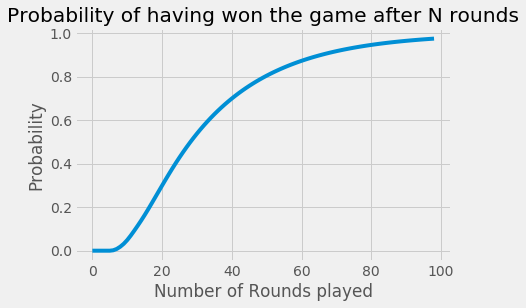

time: 143 ms


In [48]:
plt.plot(p_win_after_n_rounds)
plt.xlabel('Number of Rounds played')
plt.ylabel('Probability')
plt.title('Probability of having won the game after N rounds')

Text(0.5,1,'Probability of winning the game in a specific round')

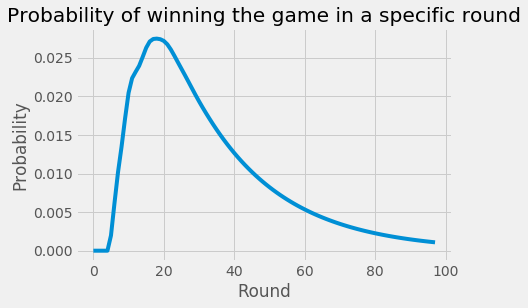

time: 139 ms


In [50]:
plt.plot(p_win_specific_round)
plt.xlabel('Round')
plt.ylabel('Probability')
plt.title('Probability of winning the game in a specific round')